In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [137]:
df = pd.read_csv('icpc-full.csv').reset_index()
df.loc[:, 'Country'].unique().tofile("region.csv", sep='\n')
df.loc[:, 'Prize'][df['Prize'].notna()].value_counts()

Prize
Latin America Champion                       22
Africa and the Middle East Champion          22
North America Champion                       21
South Pacific Champion                       18
World Champion, Europe Champion              14
Asia Champion                                14
Europe Champion                               8
World Champion, Asia Champion                 4
Asia Pacific Champion                         4
Asia West Champion                            4
World Champion, Northern Eurasia Champion     3
Asia East Champion                            3
World Champion                                1
World Champion, North America Champion        1
Northern Eurasia Champion                     1
Name: count, dtype: int64

In [138]:
region_mapping = pd.read_csv('region-map.csv')
df = pd.merge(df, region_mapping, on='Country')
df[df['Region'].isna()]

,index,Year,Date,Host,City,Venue,Rank,University,Country,Team,...,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize,Region


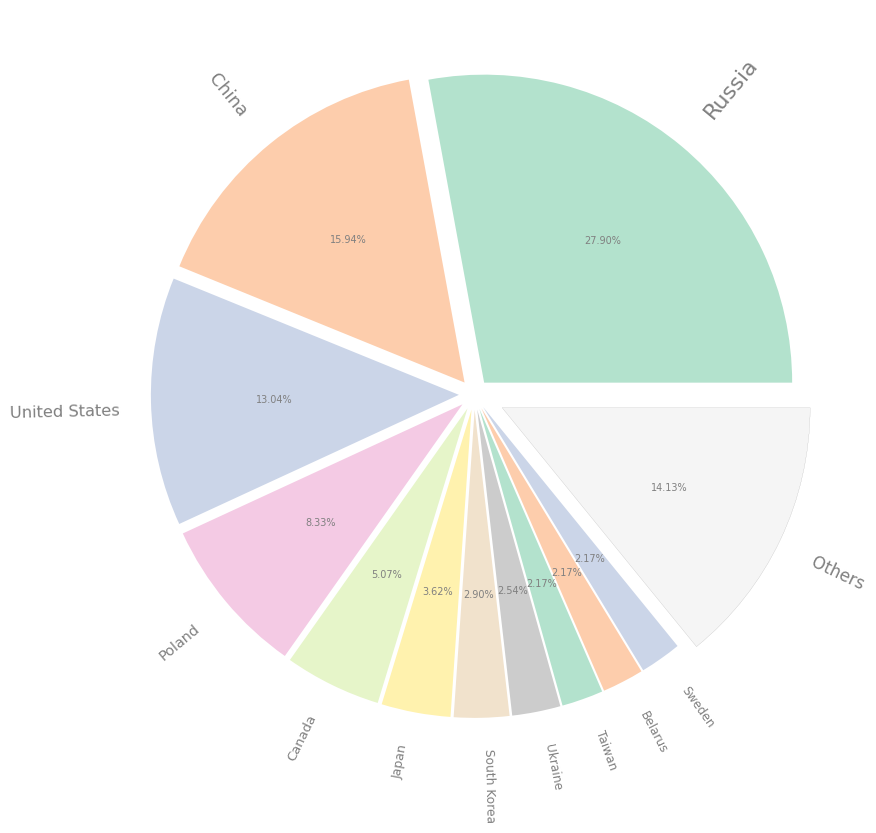

In [139]:
# Number of teams per country that received a medal (Ranks 1-12).
fig, ax = plt.subplots(figsize=(10,10))

medal_team_per_country = df[df['Rank'] <= 12]['Country'].value_counts()
medal_team_per_country = pd.concat([
    medal_team_per_country.head(11),
    pd.Series({'Others': medal_team_per_country.tail(medal_team_per_country.size - 11).sum()})
])

patches, texts, autotexts = ax.pie(
    medal_team_per_country,
    labels=medal_team_per_country.index,
    rotatelabels=True,
    autopct='%1.2f%%',
    colors=plt.cm.Pastel2.colors,
    explode=([0.05] * (medal_team_per_country.size - 1)) + [0.1]
)

patches[-1].set_color('whitesmoke')
patches[-1].set_edgecolor('grey')
patches[-1].set_linewidth(0.1)

text_sizes = medal_team_per_country.values / medal_team_per_country.values[0] * 8 + 8
for i in range(len(texts)):
    t = texts[i]
    t.set_color('grey')
    t.set_size(text_sizes[i])
for t in autotexts:
    t.set_color('grey')
    t.set_size('7')

plt.show()

In [140]:
# Average number of problems solved
aver = df.loc[:, ['Year', 'Score']]
aver = aver.rename(columns={'Score': 'Average'})
aver = aver.groupby('Year').mean()

# Average number of problems solved by top 50
aver_top50 = df[df['Rank'] <= 50].loc[:, ['Year', 'Score']]
aver_top50 = aver_top50.rename(columns={'Score': 'Average (Top 50)'})
aver_top50 = aver_top50.groupby('Year').mean()

# Average number of problems solved by top 12
aver_top12 = df[df['Rank'] <= 12].loc[:, ['Year', 'Score']]
aver_top12 = aver_top12.rename(columns={'Score': 'Average (Top 12)'})
aver_top12 = aver_top12.groupby('Year').mean()

# Max number of problems
max_problems = df.loc[:, ['Year', 'Total']]
max_problems = max_problems.rename(columns={'Total': 'Max Problems'})
max_problems = max_problems.groupby('Year').first()

aver_comb = aver.merge(aver_top50, left_on='Year', right_on='Year')
aver_comb = aver_comb.merge(aver_top12, left_on='Year', right_on='Year')
aver_comb = aver_comb.merge(max_problems, left_on='Year', right_on='Year')

In [141]:
# Average number of problems solved
aver_pcnt = df.loc[:, ['Year', 'Score Percentage']]
aver_pcnt = aver_pcnt.rename(columns={'Score Percentage': 'Average'})
aver_pcnt = aver_pcnt.groupby('Year').mean()

# Average number of problems solved by top 50
aver_pcnt_top50 = df[df['Rank'] <= 50].loc[:, ['Year', 'Score Percentage']]
aver_pcnt_top50 = aver_pcnt_top50.rename(columns={'Score Percentage': 'Average (Top 50)'})
aver_pcnt_top50 = aver_pcnt_top50.groupby('Year').mean()

# Average number of problems solved by top 12
aver_pcnt_top12 = df[df['Rank'] <= 12].loc[:, ['Year', 'Score Percentage']]
aver_pcnt_top12 = aver_pcnt_top12.rename(columns={'Score Percentage': 'Average (Top 12)'})
aver_pcnt_top12 = aver_pcnt_top12.groupby('Year').mean()

aver_pcnt_comb = aver_pcnt.merge(aver_pcnt_top50, left_on='Year', right_on='Year')
aver_pcnt_comb = aver_pcnt_comb.merge(aver_pcnt_top12, left_on='Year', right_on='Year')

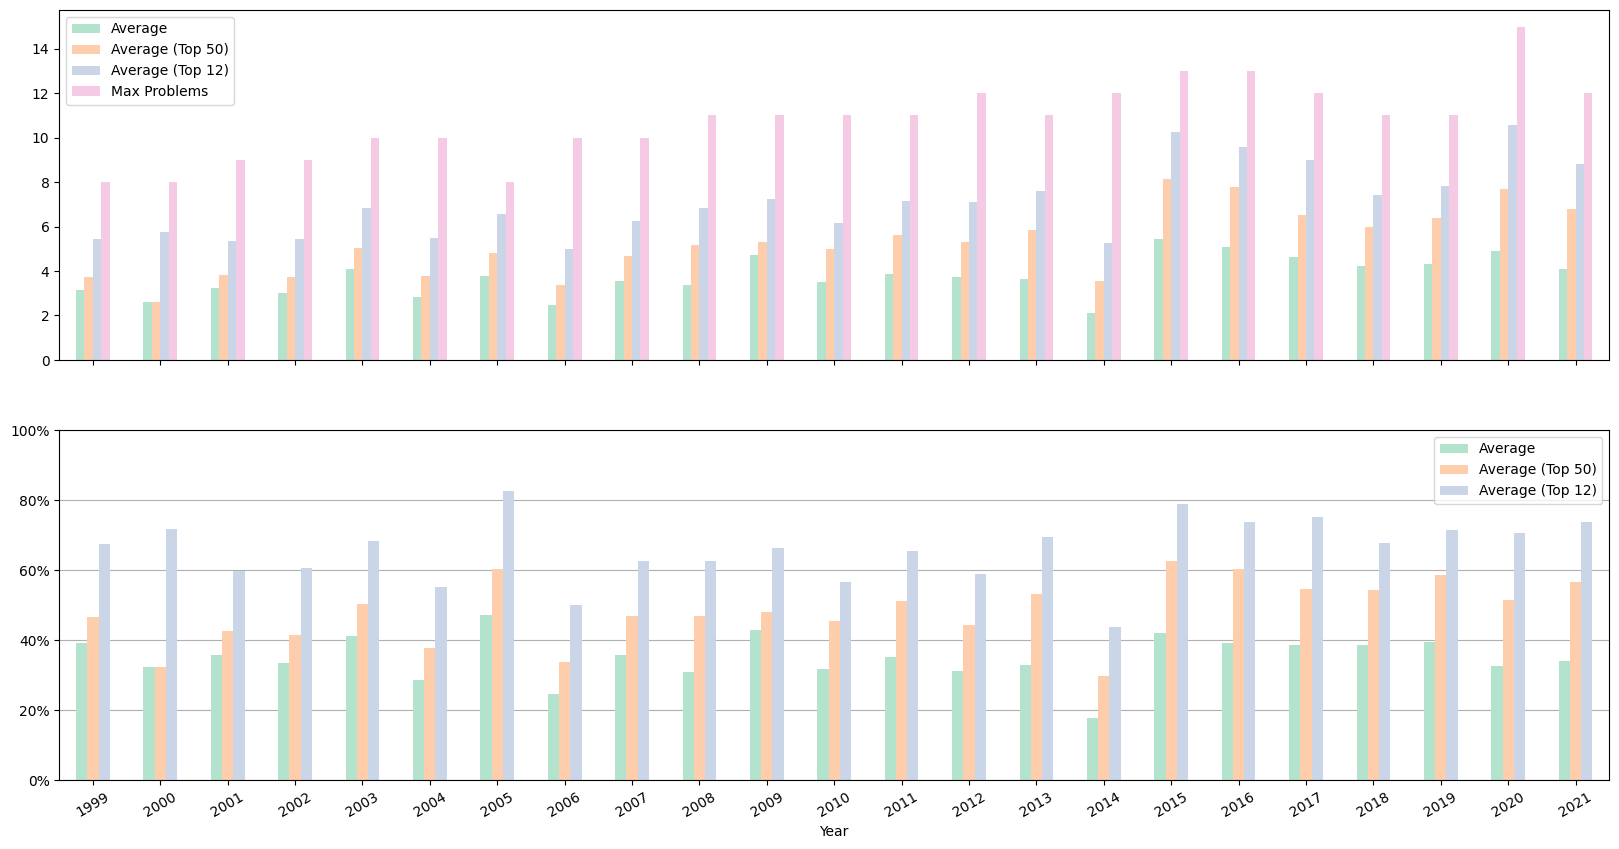

In [142]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10), sharex=True)

aver_comb.plot(kind='bar', ax=ax0, color=plt.cm.Pastel2.colors)
aver_pcnt_comb.plot(kind='bar', ax=ax1, color=plt.cm.Pastel2.colors, rot=30)

ax1.set_ylim([0.0, 1.0])
ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()

/tmp/ipykernel_11955/1646923630.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


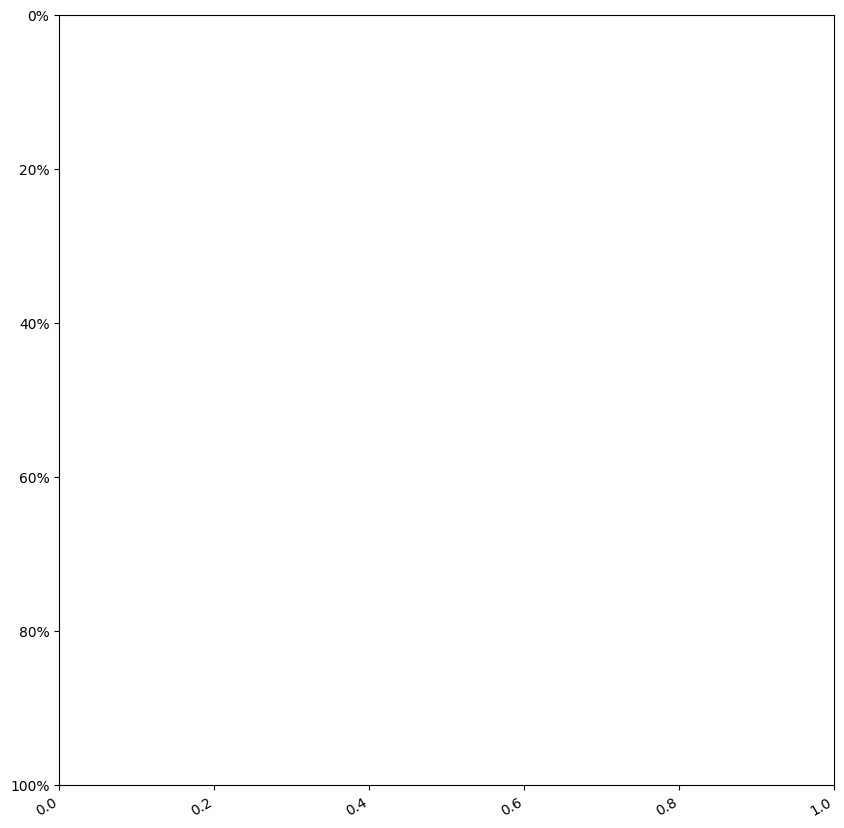

,Africa and the Middle East,Latin America,Asia West,North America,South Pacific,Asia Pacific,Asia East,Europe,Northen Eurasia
0,NaN,NaN,NaN,0.016129,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032258,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048387
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064516,NaN
4,NaN,NaN,NaN,0.080645,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2303,0.954545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2304,0.954545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2305,NaN,NaN,NaN,NaN,NaN,0.954545,NaN,NaN,NaN
2306,NaN,0.954545,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,10))

rank_percentile = df.groupby(['Year'])['Rank'].transform(lambda x: x / x.count()).rename("Rank Percentile").reset_index()
rank_percentile = pd.merge(df, rank_percentile)

g = rank_percentile.groupby(['Region'])
rank_percentile = pd.DataFrame({col: val['Rank Percentile'] for col, val in g})

median = rank_percentile.median()
median.sort_values(ascending=False, inplace=True)
rank_percentile = rank_percentile[median.index]

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# ax1.set_ylim(bottom=1)
ax1.invert_yaxis()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()

/tmp/ipykernel_11955/2175569868.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30, ha='right')


TypeError: no numeric data to plot

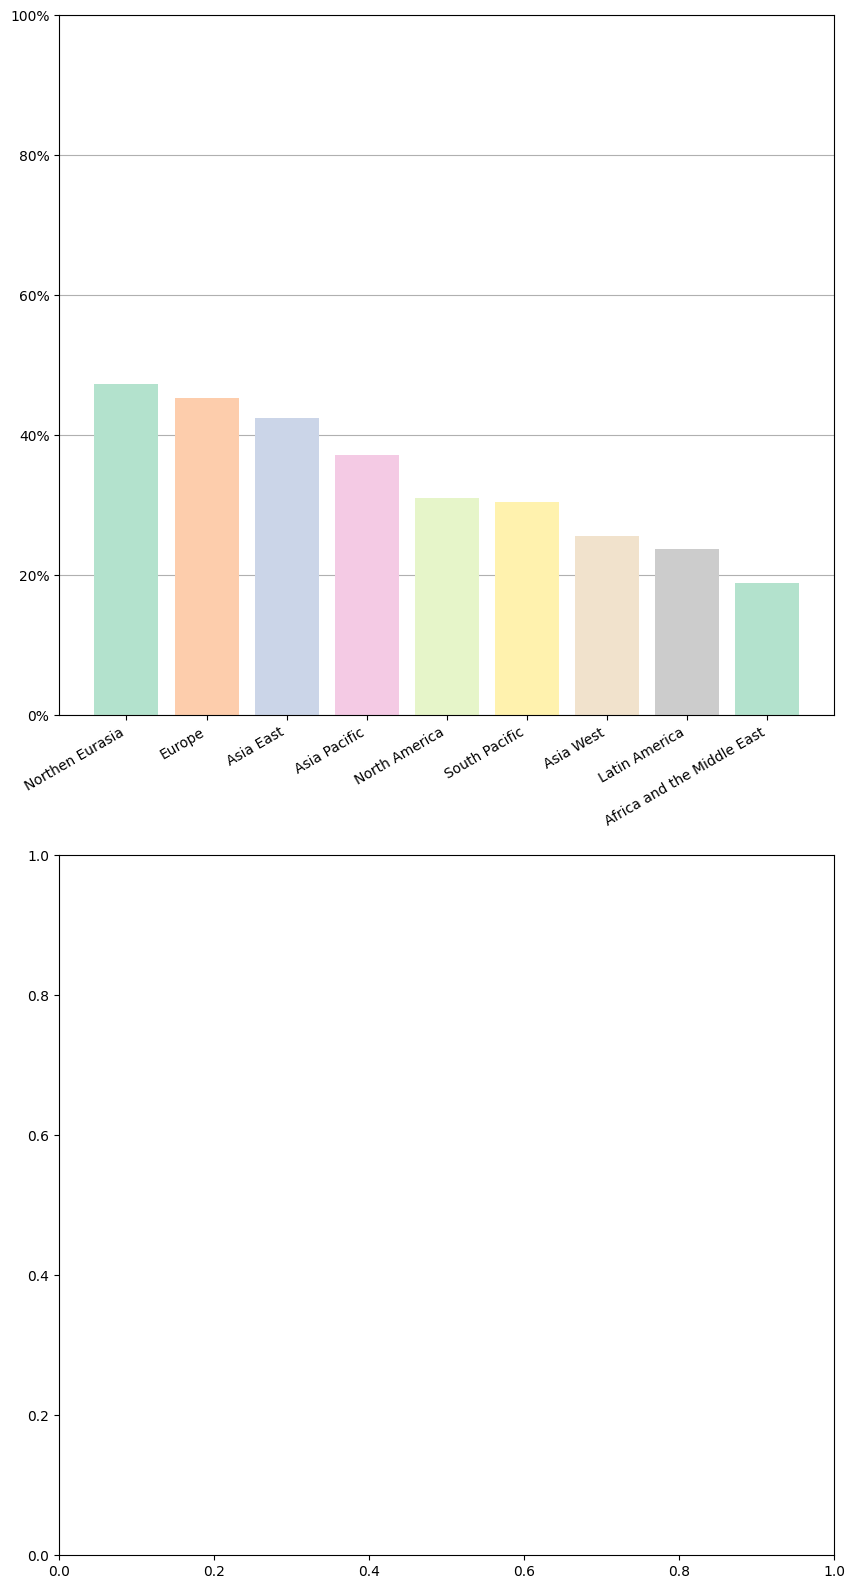

In [166]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,20))

aver_region_pcnt = df.loc[:, ['Region', 'Score Percentage']]
aver_region_pcnt = aver_region_pcnt.rename(columns={'Score Percentage': 'Average'})
aver_region_pcnt = aver_region_pcnt.groupby('Region').mean().sort_values(by='Average', ascending=False)

ax0.bar(
    aver_region_pcnt.index,
    aver_region_pcnt['Average'],
    color=plt.cm.Pastel2.colors
)

# aver_region_pcnt.T.plot(kind='bar', ax0=ax0, color=plt.cm.Pastel2.colors)

ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30, ha='right')

ax0.set_ylim([0.0, 1.0])
ax0.grid(axis='y')
ax0.set_axisbelow(True)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

rank_percentile = df.groupby(['Year'])['Rank'].transform(lambda x: x / x.count()).rename("Rank Percentile").reset_index()
rank_percentile = pd.merge(df, rank_percentile)

rank_percentile_order = rank_percentile \
    .loc[:, ['Region', 'Rank Percentile']] \
    .groupby(['Region']) \
    .median() \
    .sort_values(by='Rank Percentile')

rank_percentile.groupby(['Region']).plot(
    kind='box',
    ax=ax1,
    column='Region'
)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# ax1.set_ylim(bottom=1)
ax1.invert_yaxis()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()